/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Absolute Error: 70.30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

Predictions vs Actual Values:
   Predicted  Actual
0   0.199443      81
1   0.199443      60


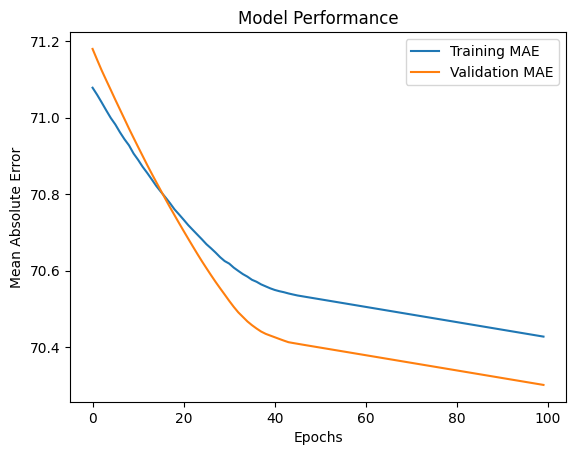

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Sample dataset (you can modify or load your own)
data = {
    'Study_Hours': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Attendance': [60, 65, 70, 75, 80, 85, 90, 92, 95, 98],
    'Previous_Score': [50, 55, 58, 60, 65, 68, 72, 75, 78, 80],
    'Final_Score': [55, 60, 62, 66, 70, 73, 76, 78, 81, 85]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split features and target
X = df[['Study_Hours', 'Attendance', 'Previous_Score']]
y = df['Final_Score']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network Model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=4, validation_data=(X_test_scaled, y_test), verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Mean Absolute Error: {mae:.2f}')

# Predict on test data
predictions = model.predict(X_test_scaled)
print("\nPredictions vs Actual Values:")
print(pd.DataFrame({'Predicted': predictions.flatten(), 'Actual': y_test.values}))

# Plot training history
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()